In [ ]:
'''
Does per game average net punt yards impact winning percentage?
'''

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [45]:
#Importing and Cleaning Data
special_teams_df = pd.read_csv('../Resources/Game_Logs_Punters.csv')

special_teams_clean = special_teams_df[['Name','Year', 'Season', 'Outcome', 'Punts', 'Net Punting Average']]
special_teams_rs = special_teams_clean.loc[special_teams_clean['Season'] == 'Regular Season']
after_2000_df = special_teams_rs.loc[special_teams_rs['Year'] >= 2000]
string_df = after_2000_df[['Name','Outcome', 'Net Punting Average']]
numeric_df = string_df.replace(to_replace=['W','L','T'], value=[100, 0, 50])
numeric_df = numeric_df.replace(to_replace= '--', value=0)
numeric_df['Net Punting Average'] = numeric_df['Net Punting Average'].astype('double')

#Using Groupby to get winning percentage and career net punt yards
winning_punt_df = numeric_df.groupby(by='Name').mean()

#Removing Punters who never punted
winning_punt_df = winning_punt_df.loc[winning_punt_df['Net Punting Average'] != 0]
winning_punt_df

,Outcome,Net Punting Average
Name,,
"Aguiar, Louie",44.444444,34.511111
"Allen, Matt",62.500000,28.818750
"Allen, Ryan",78.125000,39.256250
"Anger, Bryan",28.750000,40.772500
"Araguz, Leo",44.444444,32.788889
...,...,...
"Walter, Ken",64.705882,34.414706
"Way, Tress",44.791667,38.947917
"Weatherford, Steve",50.349650,37.641958


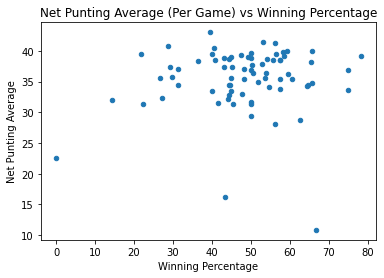

In [50]:
winning_punt_df.plot(kind='scatter', x='Outcome', y='Net Punting Average')
plt.xlabel('Winning Percentage')
plt.title('Net Punting Average (Per Game) vs Winning Percentage')

plt.show()

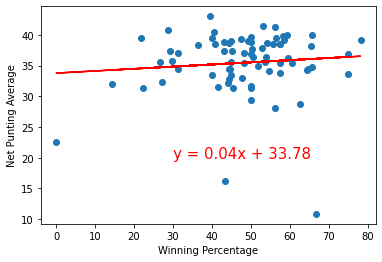

The r^2 value is 0.008881002642968396
0.09423907174292623


In [58]:
x_values = winning_punt_df['Outcome']
y_values = winning_punt_df['Net Punting Average']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Winning Percentage')
plt.ylabel('Net Punting Average')
plt.show()
print(f'The r^2 value is {rvalue * rvalue}')

In [ ]:
'''
With an r value of .09423, we find a very weak positive correlation
between net punting yards per game and winning percentage. Further,
only about .888% of the variation in winning percentage can be explained
by net punting yards per game.
'''